In [23]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [24]:
# load raw data
xdat = np.loadtxt('xvals.dat')
ydat = np.loadtxt('yvals.dat')

# define training data
# NOTE: In this exercise we are not measuring performance
# or performing model selection, so for demonstration purposes
# we will use all of the data for training and there is no test set.
X_train = xdat
y_train = ydat

In [25]:
# fit the linear Support Vector Classifier
clf = LogisticRegression(solver='lbfgs')
starttime = time.time()
clf.fit(X_train, y_train)
elapsedtime = time.time()-starttime
print('Elapsed time: ')
print(elapsedtime)

Elapsed time: 
0.010273933410644531


-----
[0.72353204 1.09840393]
-2.4966430753409816
[12]


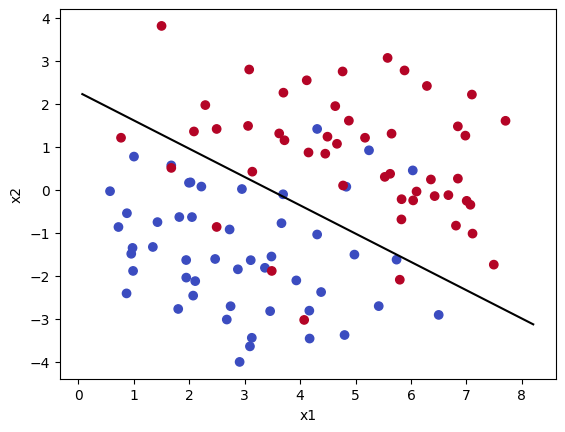

In [26]:
# plot training data
fig, ax = plt.subplots()
ax.scatter(xdat[:,0], xdat[:,1], c=ydat, cmap='coolwarm')
ax.set(xlabel='x1', ylabel='x2')

# set ranges for plots
x1_min, x1_max = xdat[:,0].min() - .5, xdat[:,0].max() + .5
x2_min, x2_max = xdat[:,1].min() - .5, xdat[:,1].max() + .5
xx1 = np.linspace(x1_min, x1_max)

# plot the decision boundary
w = clf.coef_[0]
b = clf.intercept_[0]
xx2 = (-w[0]/w[1])*xx1 - b/w[1]
ax.plot(xx1, xx2, 'k')

print('-----')
# print decision boundary
print(w)
print(b)
# print number of iterations of optimization algorithm
print(clf.n_iter_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.2s finished


-----
C values: [0.0001, 0.001, 0.01, 0.1, 1, 10]
1 - accuracy scores [0.44444444 0.14444444 0.13444444 0.11222222 0.11222222 0.11222222]


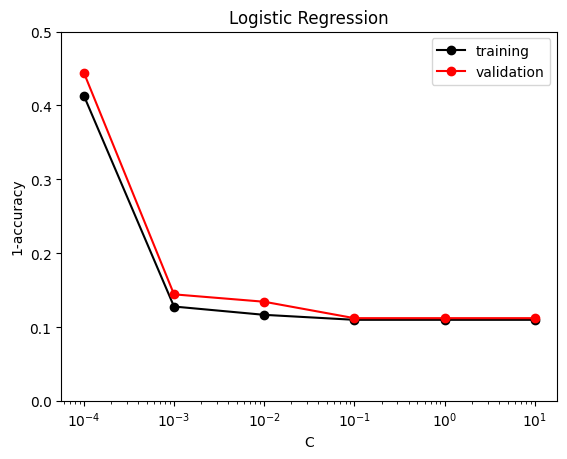

In [28]:
# Part a
from sklearn.model_selection import validation_curve

# use k-fold cross-validation to fit 
# the linear Support Vector Classifier
# for different values of C;
Clist = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Code from hw2
# use cv=10 for 10-fold cross-validation. 10 fold cross validation is better for smaller datasets
train_scores, valid_scores = validation_curve(clf, xdat, ydat, param_name='C', param_range=Clist, cv=10, n_jobs=4, verbose=1, scoring='accuracy')

# compute the mean training and validation errors over k folds for each C
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# plot training and validation error as a function of C
fig, ax = plt.subplots()
ax.plot(Clist, 1-train_scores_mean, 'k-o', label='training')
ax.plot(Clist, 1-valid_scores_mean, 'r-o', label='validation')
ax.set(xlabel='C', ylabel='1-accuracy', xscale='log', ylim=[0,1], title='Logistic Regression')
ax.set_ylim([0, 0.5])
ax.legend(loc='best')

# print the mean validation errors over k folds for each C
print('-----')
print("C values:", Clist)
print("1 - accuracy scores", 1-valid_scores_mean)

# Part b

From looking at the documentation, the six options for the "solver" parameter in LogisticRegression are:
‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’



In [19]:
# part b
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solvers:
    print(f"Solver: {solver}")
    
    # fit logistic regression with current solver
    clf = LogisticRegression(solver=solver)
    start_time = time.time()
    clf.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    print(f"Elapsed time: {elapsed_time:.3f} seconds")
    print(f"Number of iterations: {clf.n_iter_}")
    
    # print decision boundary
    w = clf.coef_[0]
    b = clf.intercept_[0]
    print(f"Decision boundary: {w[0]:.3f}*x1 + {w[1]:.3f}*x2 + {b:.3f} = 0")
    
    print("---")

Solver: lbfgs
Elapsed time: 0.007 seconds
Number of iterations: [12]
Decision boundary: 0.724*x1 + 1.098*x2 + -2.497 = 0
---
Solver: liblinear
Elapsed time: 0.002 seconds
Number of iterations: [5]
Decision boundary: 0.554*x1 + 1.072*x2 + -1.701 = 0
---
Solver: newton-cg
Elapsed time: 0.004 seconds
Number of iterations: [6]
Decision boundary: 0.724*x1 + 1.099*x2 + -2.497 = 0
---
Solver: newton-cholesky
Elapsed time: 0.003 seconds
Number of iterations: [4]
Decision boundary: 0.723*x1 + 1.098*x2 + -2.496 = 0
---
Solver: sag
Elapsed time: 0.002 seconds
Number of iterations: [43]
Decision boundary: 0.722*x1 + 1.098*x2 + -2.492 = 0
---
Solver: saga
Elapsed time: 0.003 seconds
Number of iterations: [98]
Decision boundary: 0.722*x1 + 1.098*x2 + -2.489 = 0
---


Based on the elapsed time and number of iterations, I categorize the solvers as follows:

Hessian based solvers:
- Newton-Cholesky
- newton-cg
- liblinear

*Explanation*: These solvers all took very few iterations and a similar amount of computational time to converge. This suggests that they are Hessian based solvers, which are more computationally expensive but are able to converge in very few iterations.

Gradient based solvers:
- sag
- saga

*Explanation*: These solvers converged in a high number of iterations yet in a very short amount of time. This suggests they are gradient based because they took more iterations but were more efficient at each step.

Neither:
- lbfgs

*Explanation*: Lbfgs took relatively few iterations to converge but still took longer than the other solvers. This suggests that it is something different but has qualities more similar to the Hessian based solvers.

# Part c

The tol parameter controls the tolerance for stopping criteria. Specifically, it is the tolerance for the optimization algorithm - training will stop when the loss stops improving by at least tol.

# Part d

The max_iter parameter controls the maximum number of iterations the optimization algorithm can run for before stopping. We want to limit the number of iterations to prevent the algorithm from running for too long if it does not converge quickly

# Part e

If fit_intercept is set to False, it assumes the decision boundary passes through the origin. Normally, we add a bias term to the feature vector x to allow the decision boundary to intersect the y-axis at values other than 0. Setting fit_intercept=False removes this bias term, constraining the boundary to pass through the origin. We add the constant term 1 to $x$ to create $\hat{x}$. This allows the model to find a nonzero value for the bias term b.